In [1]:
# -*- coding: utf-8 -*-
%pylab inline

from collections import namedtuple
import numpy as np
#from matplotlib import pyplot as plot
from wingstructure.multhopp import multhopp

Populating the interactive namespace from numpy and matplotlib


# Validierung Multhopp 

## Zirkulationsverteilung
Daten aus H.Schlichting, E.Truckenbrodt-Aerodynamik des Flugzeugs

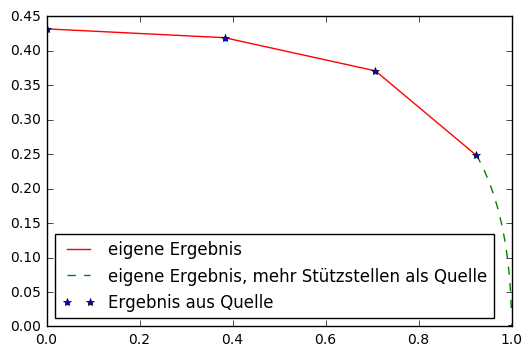

In [2]:
# -*- coding: utf-8 -*-
# Validierungsdaten aus H.Schlichting, E.Truckenbrodt-Aerodynamik des Flugzeugs
lam = 6 # Streckung
    
b = 15 # m Spannweite
c = b/lam # Flügeltiefe
y_li = [0,b/2] # Stüzstellen
    
alpha = 1 # Grad
    
N_M = 7

# Ergebnisse aus Quelle
eta = [0,0.3827,0.7071,0.9239,1]
gam = [0.4320,0.4192,0.3710,0.2485,0]

# Berechnung
result = multhopp(alpha,[c,c],y_li,N_M=7)

# Berechnung Genauer
result2 = multhopp(alpha,[c,c],y_li,N_M=90)

# eigene Ergebnisse
eta2 = result['y_v_li'] [:4]/b*2
gamma2 = result['gamma_li'][:4]

eta3 = result2['y_v_li'][:12]/b*2
gamma3 = result2['gamma_li'][:12]

figure()
    
plot(eta2,gamma2,'r',label='eigene Ergebnis')
plot(eta3,gamma3,'g--',label=u'eigene Ergebnis, mehr Stützstellen als Quelle')
plot(eta,gam,'b*',label='Ergebnis aus Quelle')

legend(loc='best')

 -> Werte Stimmen sehr exakt überein. Damit sollte Bestimmung der Multhopp-Koeffizienten korrekt sein.

## Induzierter Widerstand

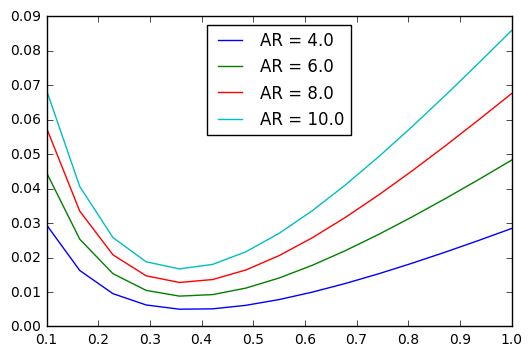

In [3]:
ARs = np.arange(4,10.5,2)

tapers = np.linspace(1e-1,1.0,15)

S = 10 #m^2

for AR in ARs:
    
    deltas = []
    ks = []
    for taper in tapers:
        
        b = np.sqrt(AR*S)
        
        c_r = S/b * 2/(1+taper)
        c_t = c_r * taper

        result = multhopp(alpha,[c_r,c_t],[0,b/2])
        
        k = result['k']
        ks.append(k)
        deltas.append(1/k-1)
        
    figure(1)    
    plot(tapers,deltas,label='AR = {}'.format(AR))

figure(1)
legend(loc='best')

Qualitativ sehr ähnlich zu Abbildung 5.20 auf Seite 420 in Fundamentals of Aerodynamics 4. Edition 

![Image Alt](Save0006.JPG)